In [1]:
import pandas as pd 
import numpy as np

In [2]:
import pandas as pd
import re

# Abrir o arquivo inteiro como texto
with open('Relatorio_Atendimento_dos_Profissionais_janeiro.csv', encoding='latin1') as f:
    linhas = f.readlines()

# Lista para armazenar os dados extraídos
dados_profissionais = []

# Padrão regex para identificar as linhas dos profissionais
# Exemplo: "JOHN RUDY HUALLPA VILA;MÉDICO CLÍNICO;858;703;04d, 13h:44min:41s;;;;"
# A ideia é que tenha um nome (texto), seguido de especialidade (texto), seguido de números e o tempo
padrao = re.compile(r'^([^;]+);([^;]+);(\d+);(\d+);([^;]+);{0,4}$')

for linha in linhas:
    linha = linha.strip()
    m = padrao.match(linha)
    if m:
        nome = m.group(1).strip()
        especialidade = m.group(2).strip()
        qtd1 = int(m.group(3))
        qtd2 = int(m.group(4))
        tempo = m.group(5).strip()
        
        dados_profissionais.append({
            'Nome': nome,
            'Especialidade': especialidade,
            'Quantidade1': qtd1,
            'Quantidade2': qtd2,
            'Tempo': tempo
        })

# Criar DataFrame
df_profissionais = pd.DataFrame(dados_profissionais)

# Exibir as primeiras linhas
print(df_profissionais.head())

# Salvar em CSV para você analisar
df_profissionais.to_csv('profissionais_extraidos.csv', index=False, encoding='latin1')


                       Nome           Especialidade  Quantidade1  Quantidade2  \
0    ABIGAIL FERREIRA PIRES              ENFERMEIRO          162          162   
1     ADRIANA DA SILVA REIS              ENFERMEIRO          138          137   
2  AGDA MAYRA SILVA MARTINS              ENFERMEIRO          105          105   
3    ALEX BONANCIM CALAZANS  AUXILIAR DE ESCRITÓRIO           56           56   
4    ALEX GONCALVES DE LIMA              ENFERMEIRO            9            9   

           Tempo  
0  09h:43min:32s  
1  10h:27min:28s  
2  05h:35min:24s  
3  01h:26min:56s  
4      36min:53s  


In [3]:
df_profissionais

,Nome,Especialidade,Quantidade1,Quantidade2,Tempo
0,ABIGAIL FERREIRA PIRES,ENFERMEIRO,162,162,09h:43min:32s
1,ADRIANA DA SILVA REIS,ENFERMEIRO,138,137,10h:27min:28s
2,AGDA MAYRA SILVA MARTINS,ENFERMEIRO,105,105,05h:35min:24s
3,ALEX BONANCIM CALAZANS,AUXILIAR DE ESCRITÓRIO,56,56,01h:26min:56s
4,ALEX GONCALVES DE LIMA,ENFERMEIRO,9,9,36min:53s
...,...,...,...,...,...
239,VIVIANY OLIVEIRA SIMAO,MÉDICO CLÍNICO,278,204,"01d, 22h:11min:10s"
240,VLADIMIR ILLANES SALAZAR,MÉDICO CLÍNICO,472,456,"01d, 17h:51s"
241,WENNDEL HENRIQUE DANTAS MELLO,MÉDICO CLÍNICO,1,1,09min:57s
242,YARA ARENA BOSCAYNO TEIXEIRA,MÉDICO CLÍNICO,79,76,03h:03min:19s


C:\Users\marce\AppData\Local\Temp\ipykernel_19936\1892691741.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10['Nome_Especialidade'] = df_top10['Nome'] + ' (' + df_top10['Especialidade'] + ')'


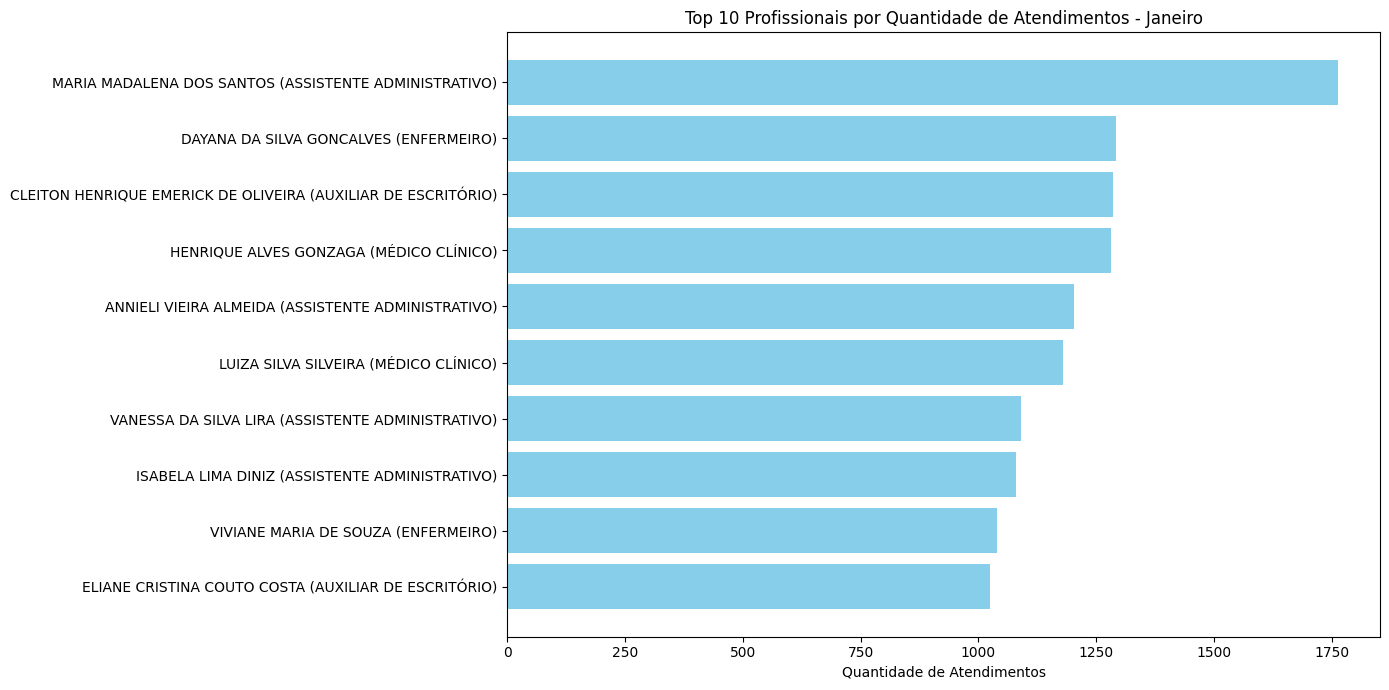

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o CSV
df = pd.read_csv('profissionais_extraidos.csv', encoding='latin1')

# Ordenar decrescente pela quantidade de atendimentos
df_sorted = df.sort_values(by='Quantidade1', ascending=False)

# Pegar os top 10
df_top10 = df_sorted.head(10)

# Criar uma coluna para exibir Nome + Especialidade juntos
df_top10['Nome_Especialidade'] = df_top10['Nome'] + ' (' + df_top10['Especialidade'] + ')'

# Gráfico de barras horizontal
plt.figure(figsize=(14,7))
plt.barh(df_top10['Nome_Especialidade'], df_top10['Quantidade1'], color='skyblue')
plt.xlabel('Quantidade de Atendimentos')
plt.title('Top 10 Profissionais por Quantidade de Atendimentos - Janeiro')
plt.gca().invert_yaxis()  # Inverter para o maior no topo
plt.tight_layout()
plt.show()


In [5]:
# Filtrar apenas profissionais cuja especialidade contém 'MÉDICO' (case insensitive)
df_medicos = df[df['Especialidade'].str.contains('MÉDICO', case=False, na=False)]

# Verificar os top 10 médicos com mais atendimentos
df_medicos_sorted = df_medicos.sort_values(by='Quantidade1', ascending=False).head(10)

print(df_medicos_sorted[['Nome', 'Especialidade', 'Quantidade1']])


                                Nome                         Especialidade  \
91            HENRIQUE ALVES GONZAGA                        MÉDICO CLÍNICO   
143             LUIZA SILVA SILVEIRA                        MÉDICO CLÍNICO   
153                   MARCOS RIBEIRO                        MÉDICO CLÍNICO   
47   DIZZAN DALLAS DOS SANTOS BENTES                        MÉDICO CLÍNICO   
77        GABRIELA DOS SANTOS MEDINA                        MÉDICO CLÍNICO   
116           JOHN RUDY HUALLPA VILA                        MÉDICO CLÍNICO   
94          HERBERT MOREIRA MARTINEZ                        MÉDICO CLÍNICO   
157       MARIA BEATRIZ PARRA MACEDO                        MÉDICO CLÍNICO   
240         VLADIMIR ILLANES SALAZAR                        MÉDICO CLÍNICO   
226              TONI LEMOS DA SILVA  MÉDICO ORTOPEDISTA E TRAUMATOLOGISTA   

     Quantidade1  
91          1282  
143         1179  
153         1001  
47          1001  
77           879  
116          858  
94      

In [6]:
df_medicos

,Nome,Especialidade,Quantidade1,Quantidade2,Tempo
5,ALEXANDRE MOURA OLIVEIRA,MÉDICO CIRURGIÃO GERAL,257,244,21h:39min:50s
8,ANA MARIA LORONO TERRAZAS,MÉDICO PEDIATRA,201,193,"01d, 04h:43min:08s"
11,ANDERSON CESAR PARTATA,MÉDICO ORTOPEDISTA E TRAUMATOLOGISTA,105,105,09h:56min:29s
12,ANDERSON DABRAMO,MÉDICO CLÍNICO,7,6,01h:15min:06s
13,ANDERSON KAIO BENTO GIL,MÉDICO CIRURGIÃO GERAL,116,116,14h:51min:28s
...,...,...,...,...,...
239,VIVIANY OLIVEIRA SIMAO,MÉDICO CLÍNICO,278,204,"01d, 22h:11min:10s"
240,VLADIMIR ILLANES SALAZAR,MÉDICO CLÍNICO,472,456,"01d, 17h:51s"
241,WENNDEL HENRIQUE DANTAS MELLO,MÉDICO CLÍNICO,1,1,09min:57s
242,YARA ARENA BOSCAYNO TEIXEIRA,MÉDICO CLÍNICO,79,76,03h:03min:19s


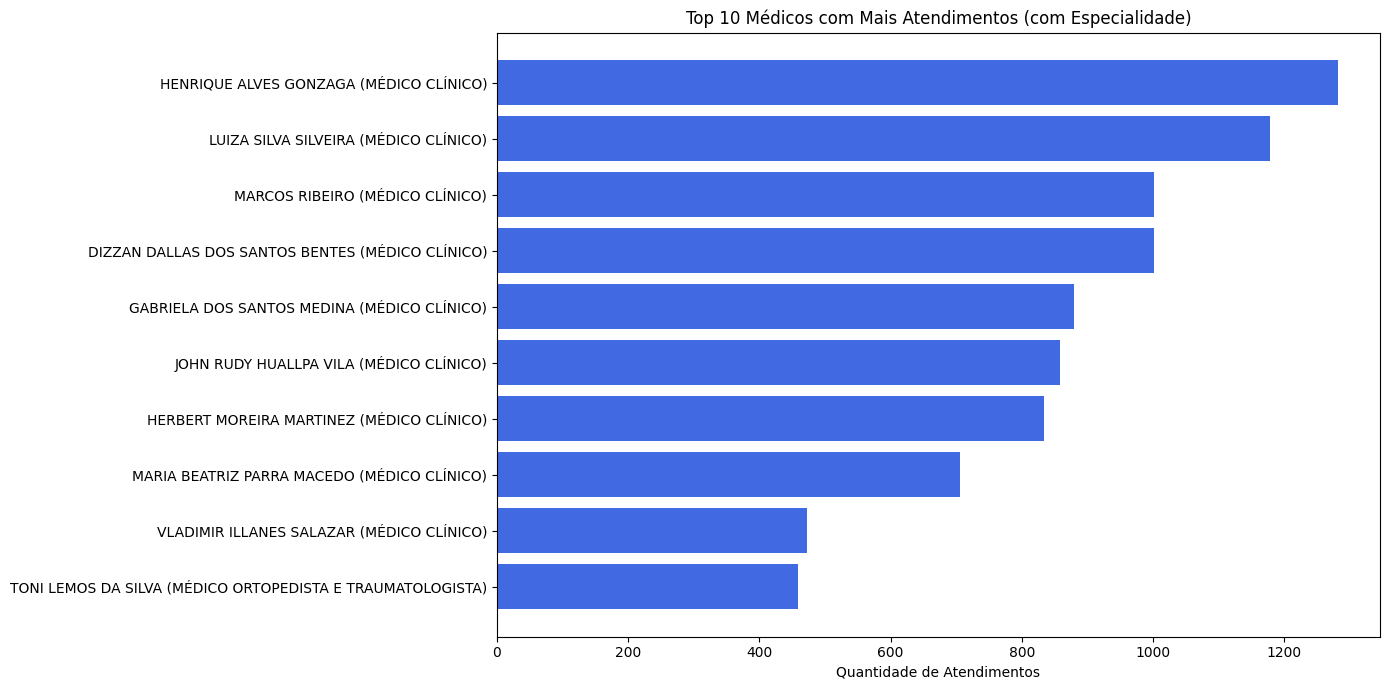

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar apenas profissionais que tenham "MÉDICO" na especialidade
df_medicos = df[df['Especialidade'].str.contains('MÉDICO', case=False, na=False)].copy()

# Ordenar pela quantidade e pegar os top 10
df_top10_medicos = df_medicos.sort_values(by='Quantidade1', ascending=False).head(10)

# Criar uma nova coluna para o gráfico, juntando nome + especialidade
df_top10_medicos['Rotulo'] = df_top10_medicos['Nome'] + ' (' + df_top10_medicos['Especialidade'] + ')'

# Plotar gráfico
plt.figure(figsize=(14, 7))
plt.barh(df_top10_medicos['Rotulo'], df_top10_medicos['Quantidade1'], color='royalblue')
plt.xlabel('Quantidade de Atendimentos')
plt.title('Top 10 Médicos com Mais Atendimentos (com Especialidade)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [8]:
df_medicos

,Nome,Especialidade,Quantidade1,Quantidade2,Tempo
5,ALEXANDRE MOURA OLIVEIRA,MÉDICO CIRURGIÃO GERAL,257,244,21h:39min:50s
8,ANA MARIA LORONO TERRAZAS,MÉDICO PEDIATRA,201,193,"01d, 04h:43min:08s"
11,ANDERSON CESAR PARTATA,MÉDICO ORTOPEDISTA E TRAUMATOLOGISTA,105,105,09h:56min:29s
12,ANDERSON DABRAMO,MÉDICO CLÍNICO,7,6,01h:15min:06s
13,ANDERSON KAIO BENTO GIL,MÉDICO CIRURGIÃO GERAL,116,116,14h:51min:28s
...,...,...,...,...,...
239,VIVIANY OLIVEIRA SIMAO,MÉDICO CLÍNICO,278,204,"01d, 22h:11min:10s"
240,VLADIMIR ILLANES SALAZAR,MÉDICO CLÍNICO,472,456,"01d, 17h:51s"
241,WENNDEL HENRIQUE DANTAS MELLO,MÉDICO CLÍNICO,1,1,09min:57s
242,YARA ARENA BOSCAYNO TEIXEIRA,MÉDICO CLÍNICO,79,76,03h:03min:19s


In [10]:
df_medicos[['Nome', 'Especialidade', 'Quantidade1']].to_csv('medicos.csv', index=False, sep=';', encoding='latin1')

In [11]:
df_profissionais

,Nome,Especialidade,Quantidade1,Quantidade2,Tempo
0,ABIGAIL FERREIRA PIRES,ENFERMEIRO,162,162,09h:43min:32s
1,ADRIANA DA SILVA REIS,ENFERMEIRO,138,137,10h:27min:28s
2,AGDA MAYRA SILVA MARTINS,ENFERMEIRO,105,105,05h:35min:24s
3,ALEX BONANCIM CALAZANS,AUXILIAR DE ESCRITÓRIO,56,56,01h:26min:56s
4,ALEX GONCALVES DE LIMA,ENFERMEIRO,9,9,36min:53s
...,...,...,...,...,...
239,VIVIANY OLIVEIRA SIMAO,MÉDICO CLÍNICO,278,204,"01d, 22h:11min:10s"
240,VLADIMIR ILLANES SALAZAR,MÉDICO CLÍNICO,472,456,"01d, 17h:51s"
241,WENNDEL HENRIQUE DANTAS MELLO,MÉDICO CLÍNICO,1,1,09min:57s
242,YARA ARENA BOSCAYNO TEIXEIRA,MÉDICO CLÍNICO,79,76,03h:03min:19s


In [12]:
df_medicos

,Nome,Especialidade,Quantidade1,Quantidade2,Tempo
5,ALEXANDRE MOURA OLIVEIRA,MÉDICO CIRURGIÃO GERAL,257,244,21h:39min:50s
8,ANA MARIA LORONO TERRAZAS,MÉDICO PEDIATRA,201,193,"01d, 04h:43min:08s"
11,ANDERSON CESAR PARTATA,MÉDICO ORTOPEDISTA E TRAUMATOLOGISTA,105,105,09h:56min:29s
12,ANDERSON DABRAMO,MÉDICO CLÍNICO,7,6,01h:15min:06s
13,ANDERSON KAIO BENTO GIL,MÉDICO CIRURGIÃO GERAL,116,116,14h:51min:28s
...,...,...,...,...,...
239,VIVIANY OLIVEIRA SIMAO,MÉDICO CLÍNICO,278,204,"01d, 22h:11min:10s"
240,VLADIMIR ILLANES SALAZAR,MÉDICO CLÍNICO,472,456,"01d, 17h:51s"
241,WENNDEL HENRIQUE DANTAS MELLO,MÉDICO CLÍNICO,1,1,09min:57s
242,YARA ARENA BOSCAYNO TEIXEIRA,MÉDICO CLÍNICO,79,76,03h:03min:19s
